### Importanto as bibliotecas

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [264]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
df = pd.read_csv("../dados/vendas-por-fatura.csv")
df.dropna(inplace=True)
df.to_excel("dados_limpos.xlsx", index=False)

### Cabeçalho da planilha

In [266]:
df.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [267]:
df.columns

Index(['N° da fatura', 'Data da fatura', 'ID Cliente', 'País', 'Quantidade',
       'Valor'],
      dtype='object')

In [268]:
df.shape

(22229, 6)

### Tratando os dados vazios e conferindo tipos de dados

In [269]:
df = df.drop_duplicates()

df = df.fillna(0)

print(df.dtypes)


N° da fatura       object
Data da fatura     object
ID Cliente        float64
País               object
Quantidade          int64
Valor              object
dtype: object


### Converter datas (se tiver colunas de data)
### Conferir estatísticas gerais

In [270]:
df['Data da fatura'] = pd.to_datetime(df['Data da fatura'], errors='coerce')
print(df.describe())

                      Data da fatura    ID Cliente    Quantidade
count                          22221  22221.000000  22221.000000
mean   2021-06-29 16:42:17.402457088  15238.398317    220.822105
min              2020-12-01 08:26:00  12346.000000 -80995.000000
25%              2021-03-28 15:42:00  13755.000000     30.000000
50%              2021-07-08 12:22:00  15136.000000    120.000000
75%              2021-10-10 17:11:00  16746.000000    254.000000
max              2021-12-09 12:50:00  18287.000000  80995.000000
std                              NaN   1732.987098   1169.306198


In [271]:
df['Valor'] = df['Valor'].str.replace('.', '').str.replace(',', '.')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')


In [272]:
print(df.dtypes)

N° da fatura              object
Data da fatura    datetime64[ns]
ID Cliente               float64
País                      object
Quantidade                 int64
Valor                    float64
dtype: object


### Analise de receita X regiao

In [273]:
df.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83


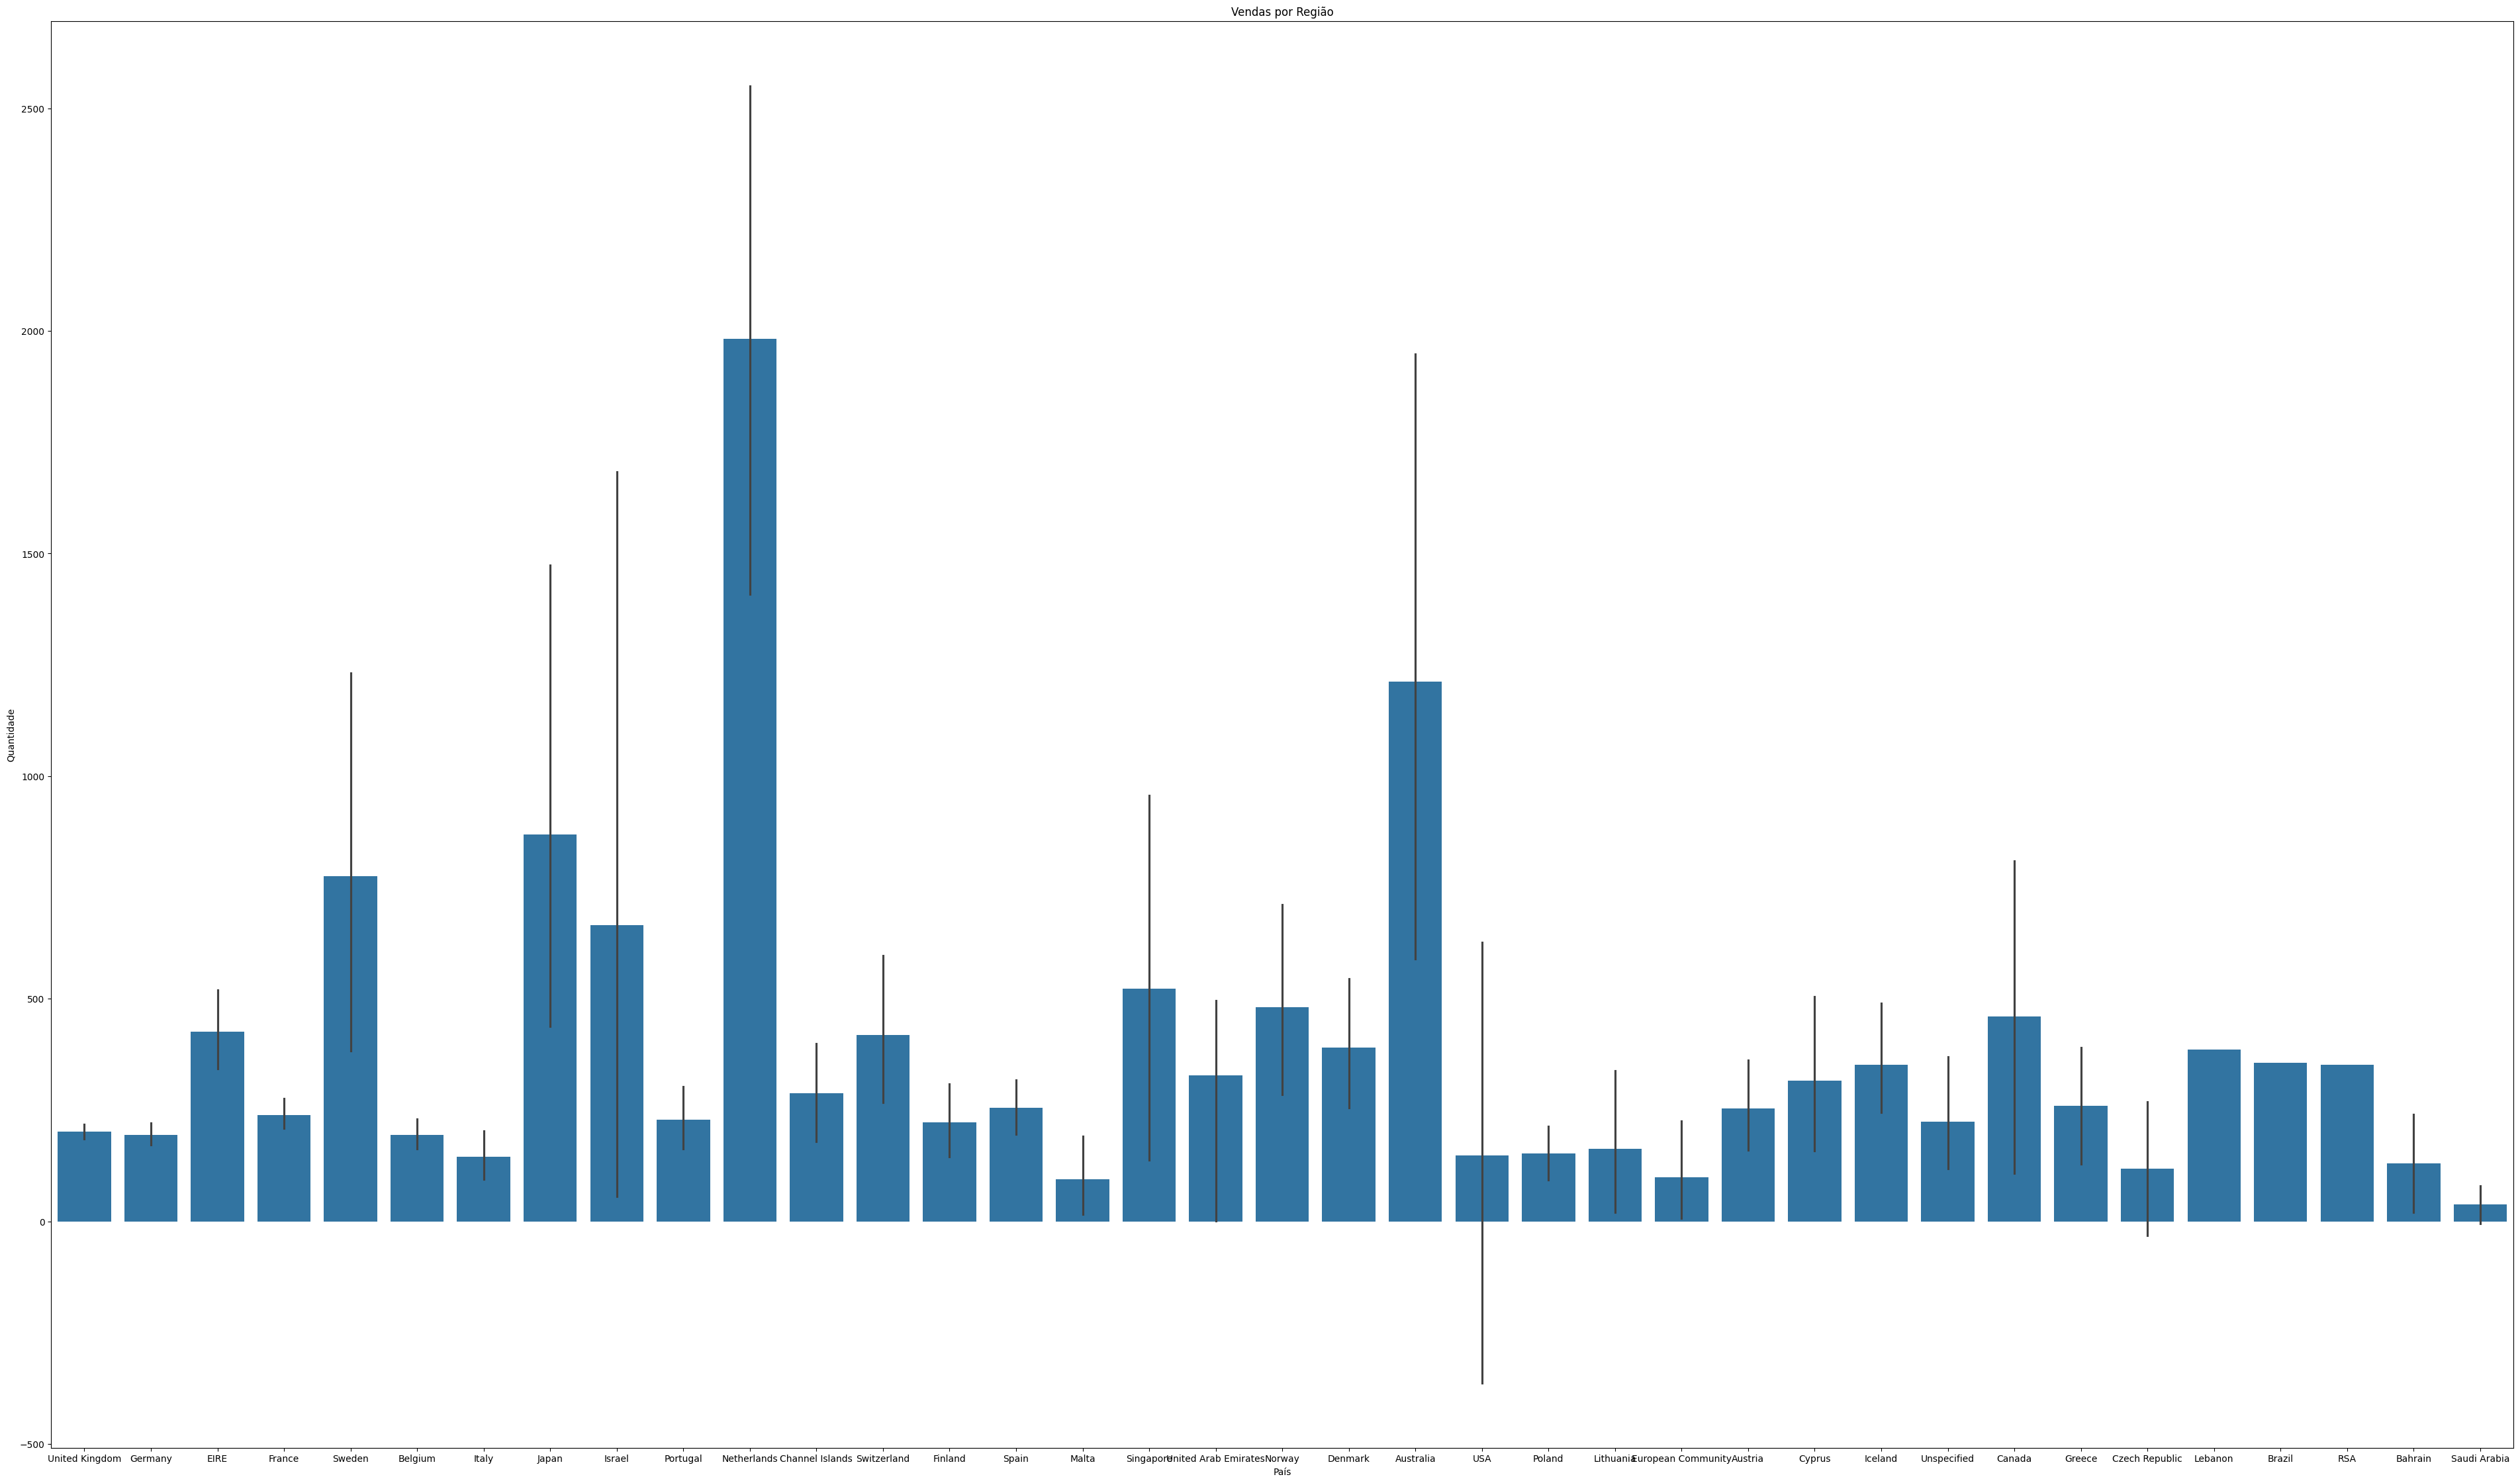

In [274]:

plt.figure(figsize=(48,28))
sns.barplot(x='País', y='Quantidade', data=df)

plt.title('Vendas por Região')
plt.show()

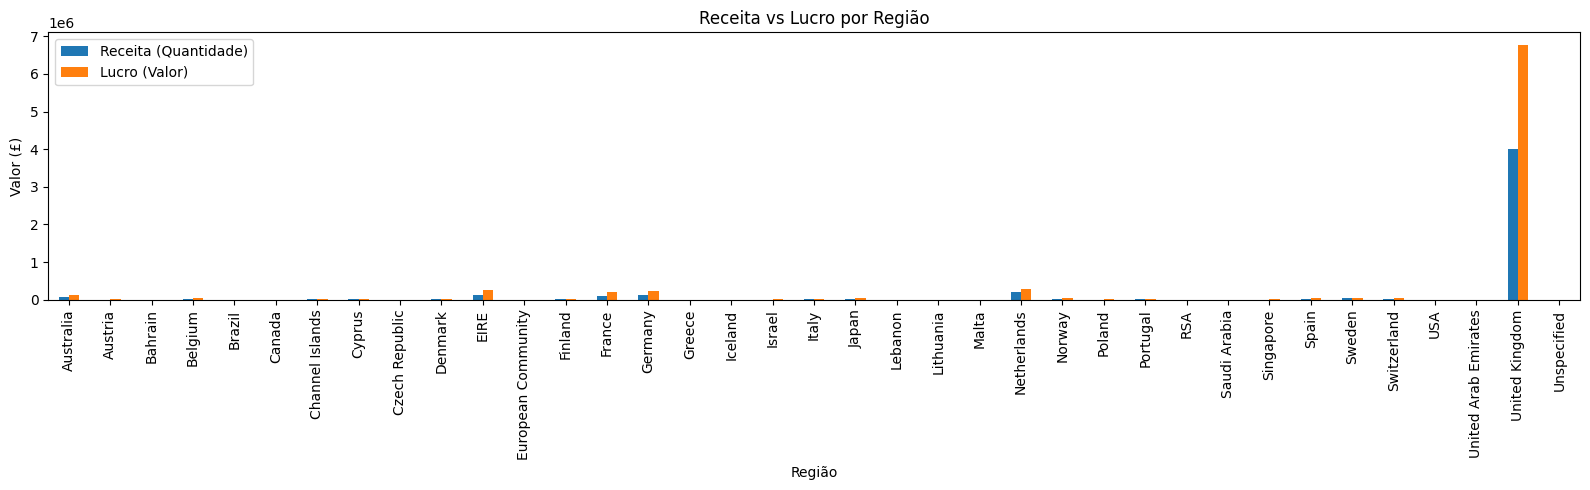

In [275]:
grouped = df.groupby('País')[['Quantidade', 'Valor']].sum().reset_index()

# Plotar
grouped.plot(x='País', y=['Quantidade', 'Valor'], kind='bar', figsize=(16,5))
plt.title('Receita vs Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Valor (£)')
plt.legend(['Receita (Quantidade)', 'Lucro (Valor)'])
plt.tight_layout()
plt.show()

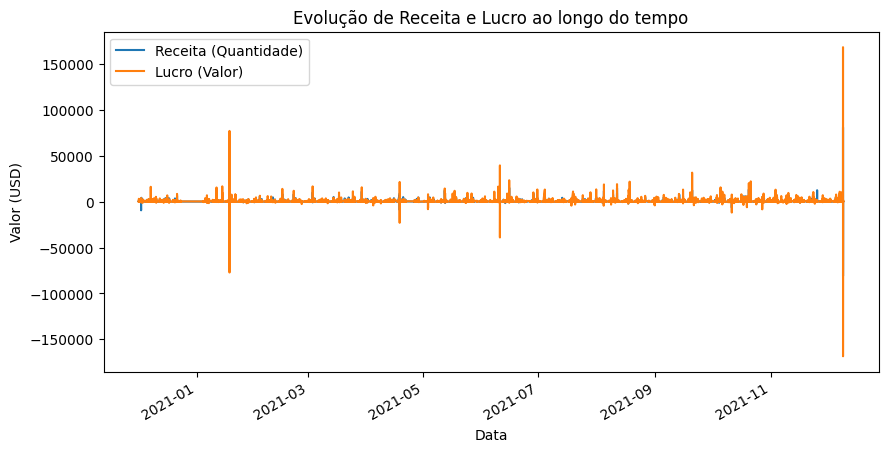

In [276]:
df['Data da fatura'] = pd.to_datetime(df['Data da fatura'], errors='coerce')

time_data = df.groupby('Data da fatura')[['Quantidade', 'Valor']].sum()

time_data.plot(figsize=(10,5))
plt.title('Evolução de Receita e Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor (USD)')
plt.legend(['Receita (Quantidade)', 'Lucro (Valor)'])
plt.show()

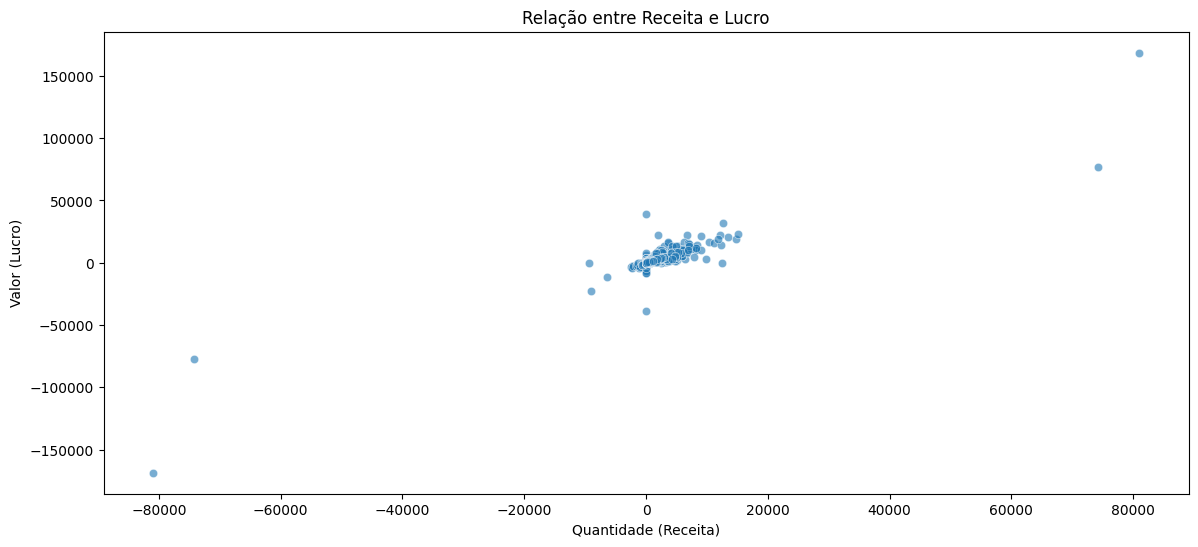

In [277]:

plt.figure(figsize=(14,6))
sns.scatterplot(x='Quantidade', y='Valor', data=df, alpha=0.6)

plt.title('Relação entre Receita e Lucro')
plt.xlabel('Quantidade (Receita)')
plt.ylabel('Valor (Lucro)')
plt.show()

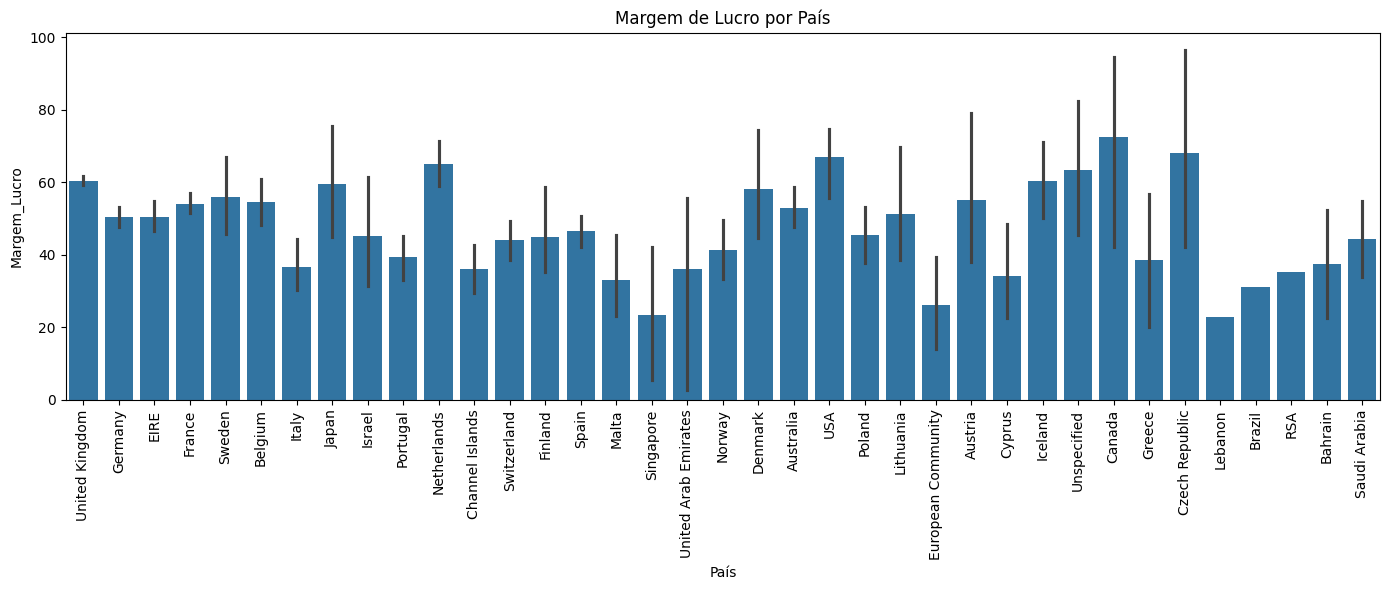

In [278]:
df['Margem_Lucro'] = (df['Quantidade'] / df['Valor']) * 100


plt.figure(figsize=(14,6))
sns.barplot(x='País', y='Margem_Lucro', data=df)
plt.title('Margem de Lucro por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [279]:
df.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Margem_Lucro
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,53.634501
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,77.718972
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,68.965517
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2.503129
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,103.529275


=== Estatísticas ===
       N° da fatura      Data da fatura    ID Cliente            País  \
count         25953               25953  22229.000000           25953   
unique        25900               23260           NaN              38   
top          542217  5/10/2021 15:05:00           NaN  United Kingdom   
freq              2                   6           NaN           23542   
mean            NaN                 NaN  15238.289892             NaN   
std             NaN                 NaN   1732.981685             NaN   
min             NaN                 NaN  12346.000000             NaN   
25%             NaN                 NaN  13755.000000             NaN   
50%             NaN                 NaN  15136.000000             NaN   
75%             NaN                 NaN  16746.000000             NaN   
max             NaN                 NaN  18287.000000             NaN   

          Quantidade          Valor  
count   25953.000000   25953.000000  
unique           NaN      

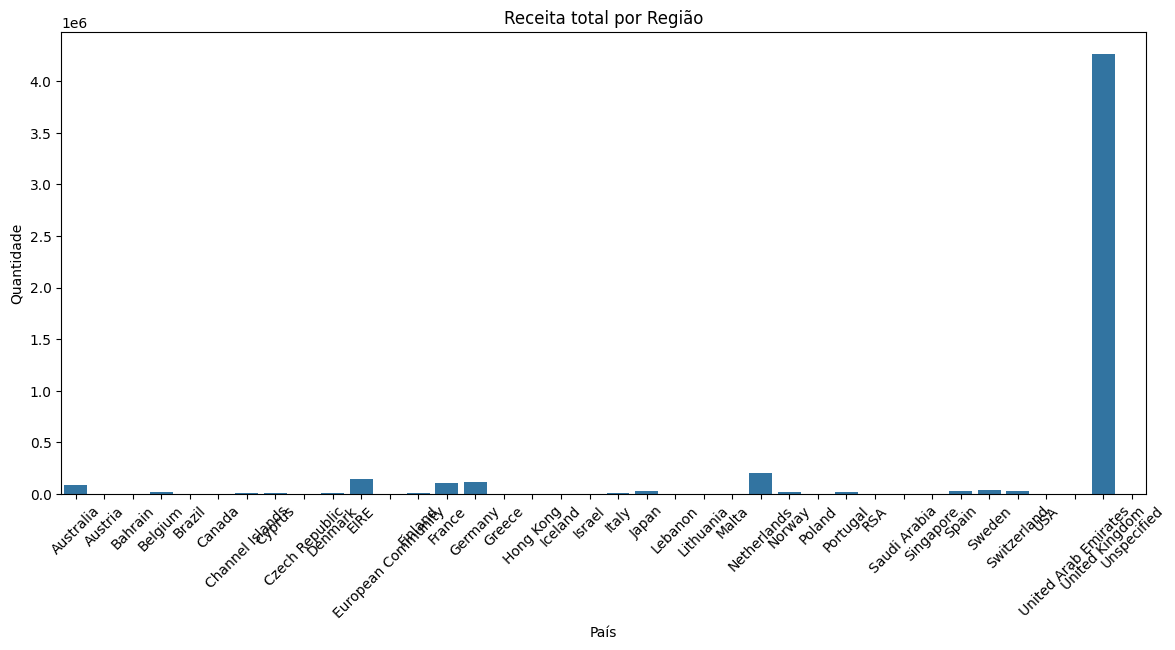

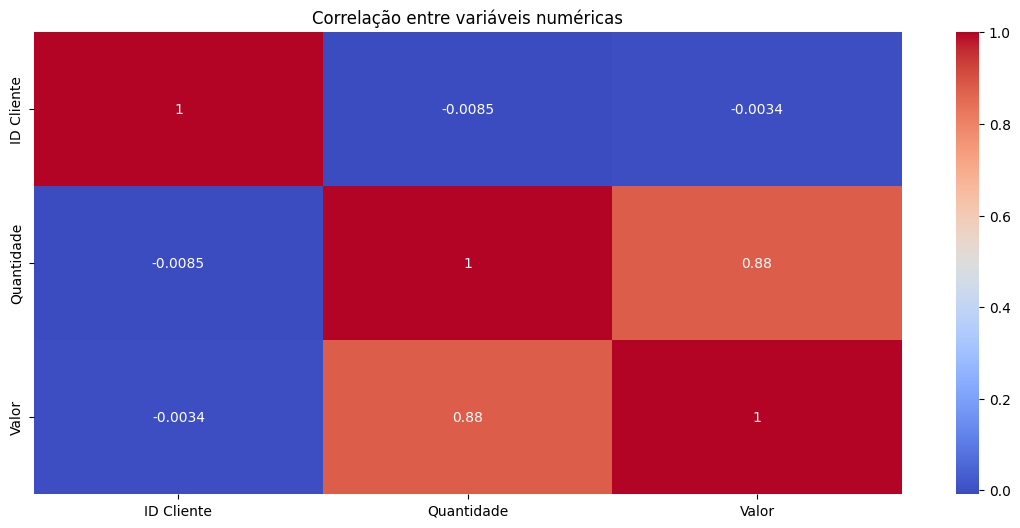

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura do dataset
df = pd.read_csv('../dados/vendas-por-fatura.csv')
df['Valor'] = df['Valor'].str.replace('.', '').str.replace(',', '.')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')


# 1️⃣ Estatísticas iniciais
print("=== Estatísticas ===")
print(df.describe(include='all'))

# 2️⃣ Contagem por categoria
print("\n=== Paises ===")
print(df['País'].value_counts())

# 3️⃣ Receita por região
plt.figure(figsize=(14,6))
receitaPais = df.groupby('País', as_index=False)['Quantidade'].sum()
sns.barplot(x='País', y='Quantidade', data=receitaPais)
plt.title('Receita total por Região')
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Correlação entre variáveis numéricas
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(14,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [281]:
from scipy.stats import pearsonr, ttest_ind
import statsmodels.api as sm

# Correlação entre receita e lucro
corr, p_value = pearsonr(df['Quantidade'], df['Valor'])
print(f"Correlação Quantidade-Valor: {corr:.2f}, p-valor: {p_value:.4f}")

# Regressão linear
X = sm.add_constant(df['Quantidade'])
model = sm.OLS(df['Valor'], X).fit()
print(model.summary())

Correlação Quantidade-Valor: 0.88, p-valor: 0.0000
                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 8.744e+04
Date:                Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:43:07   Log-Likelihood:            -2.1507e+05
No. Observations:               25953   AIC:                         4.301e+05
Df Residuals:                   25951   BIC:                         4.302e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [282]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Dados
df = pd.read_csv('../dados/vendas-por-fatura.csv')
df['Valor'] = df['Valor'].str.replace('.', '').str.replace(',', '.')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

X = df[['Quantidade']]
y = df['Valor']

# 2️⃣ Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Treinamento
model = LinearRegression()
model.fit(X_train, y_train)

# 4️⃣ Previsão
y_pred = model.predict(X_test)

# 5️⃣ Avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Absoluto Médio (MAE): 235.43
Coeficiente de Determinação (R²): 0.84


In [283]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 1️⃣ Definir modelo e parâmetros
model = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

# 2️⃣ Rodar o GridSearch
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X, y)

# 3️⃣ Resultados
print("Melhores parâmetros:", grid.best_params_)
print("Melhor R²:", grid.best_score_)

Melhores parâmetros: {'max_depth': 5, 'min_samples_split': 10}
Melhor R²: 0.39686921138346387


In [284]:
print(df[['Quantidade', 'Valor']].head())
print(df[['Quantidade', 'Valor']].corr())

   Quantidade   Valor
0         123  229.33
1         163  209.73
2          -1   -1.45
3           1   39.95
4         357  344.83
            Quantidade     Valor
Quantidade    1.000000  0.878148
Valor         0.878148  1.000000


In [285]:
print(df[['Quantidade', 'Valor']].corr())


            Quantidade     Valor
Quantidade    1.000000  0.878148
Valor         0.878148  1.000000


In [286]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 1️⃣ Definir modelo e parâmetros
model = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

# 2️⃣ Rodar o GridSearch
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X, y)

# 3️⃣ Resultados
print("Melhores parâmetros:", grid.best_params_)
print("Melhor R²:", grid.best_score_)

Melhores parâmetros: {'max_depth': 5, 'min_samples_split': 10}
Melhor R²: 0.39686921138346387


In [287]:
df['Valor'] = df['Valor'].astype(str)
df['Valor'] = df['Valor'].str.replace('.', '', regex=False) 
df['Valor'] = df['Valor'].str.replace(',', '.', regex=False) 
df['Valor'] = df['Valor'].astype(float)

# Corrigir Quantidade (se também for string)
df['Quantidade'] = pd.to_numeric(df['Quantidade'], errors='coerce')

In [288]:
df = df.drop(['N° da fatura', 'Data da fatura'], axis=1)

In [289]:
print(df.dtypes)

ID Cliente    float64
País           object
Quantidade      int64
Valor         float64
dtype: object


In [290]:
vendas_pais = df.groupby('País')['Valor'].sum().sort_values(ascending=False)
print(vendas_pais)

País
United Kingdom          640441266.0
EIRE                     23475830.0
Netherlands              23038578.0
Germany                  17977117.0
France                   15620991.0
Australia                11728213.0
Switzerland               5243813.0
Spain                     4483588.0
Belgium                   3434672.0
Norway                    3155716.0
Sweden                    2866313.0
Portugal                  2528894.0
Japan                     2514083.0
Channel Islands           1715380.0
Italy                     1343622.0
Finland                   1254806.0
Cyprus                    1095675.0
Denmark                   1088594.0
Hong Kong                  969305.0
Singapore                  912039.0
Austria                    828385.0
Israel                     709350.0
Poland                     590364.0
Greece                     475552.0
Iceland                    431000.0
Unspecified                395311.0
Canada                     366638.0
United Arab Emirates   

In [291]:
df['Lucro'] = df['Valor'] - df['Quantidade']

margem = df.groupby('País')['Lucro'].sum() / df.groupby('País')['Valor'].sum() * 100
print(margem)


País
Australia               99.286737
Austria                 99.417300
Bahrain                 95.258935
Belgium                 99.325933
Brazil                  96.887023
Canada                  99.246396
Channel Islands         99.447469
Cyprus                  99.423460
Czech Republic          99.167744
Denmark                 99.247837
EIRE                    99.391549
European Community      98.959206
Finland                 99.149988
France                  99.292747
Germany                 99.346681
Greece                  99.672801
Hong Kong               99.507998
Iceland                 99.429698
Israel                  99.386340
Italy                   99.404669
Japan                   98.996930
Lebanon                 99.772121
Lithuania               99.455150
Malta                   99.405680
Netherlands             99.131335
Norway                  99.390091
Poland                  99.381229
Portugal                99.360195
RSA                     99.648811
Saudi Ara

In [292]:
# 🔍 Verificar colunas com texto
print("Colunas categóricas (texto):")
print(X_train.select_dtypes(include='object').columns)

# 🧹 Remover colunas que não fazem sentido para o modelo
colunas_remover = ['Order_Date', 'Product_Name', 'Size']

for col in colunas_remover:
    if col in X_train.columns:
        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)

# 🔄 Codificar as colunas categóricas restantes
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 🧩 Garantir que as colunas de treino e teste fiquem iguais
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("✅ Todas as colunas agora são numéricas!")
print(X_train.dtypes.head())


Colunas categóricas (texto):
Index([], dtype='object')
✅ Todas as colunas agora são numéricas!
Quantidade    int64
dtype: object


In [293]:
print(X_train.select_dtypes(include='object').columns)


Index([], dtype='object')


In [294]:
# 🔍 Verificar colunas com texto
print("Colunas categóricas (texto):")
print(X_train.select_dtypes(include='object').columns)


for col in colunas_remover:
    if col in X_train.columns:
        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)

# 🔄 Codificar as colunas categóricas restantes
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 🧩 Garantir que as colunas de treino e teste fiquem iguais
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("✅ Todas as colunas agora são numéricas!")
print(X_train.dtypes.head())


Colunas categóricas (texto):
Index([], dtype='object')
✅ Todas as colunas agora são numéricas!
Quantidade    int64
dtype: object


In [295]:
print(X_train.select_dtypes(include='object').columns)


Index([], dtype='object')


In [296]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [297]:
print(X_train.dtypes.head())


Quantidade    int64
dtype: object


In [298]:
grid.fit(X_train, y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [299]:
df.to_csv("../dados/dados_limpos.csv", index=False)